In [134]:
import seaborn as sn
import pandas as pd
import matplotlib as plt
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, roc_curve

In [196]:
data = pd.read_csv('/Users/nouha/Downloads/tsunami_filtered-2 2.csv')
data.head(2)

,Unnamed: 0,id,year,month,day,period,latitude,longitude,location_n,area,...,runup_ht_r,runup_hori,type_measu,type_mea_1,dist_from_,event_regi,event_re_1,cause,event_va_1,date
0,0,15817,2004,12,26,0.0,5.283,95.247,"ACEH, SUMATRA",ACEH,...,5,0.0,5,"Runup height, post-tsunami survey measurement",229,60,Indian Ocean (including west coast of Australia),,,26/12/2004
1,1,15818,2004,12,26,0.0,5.355,95.242,"ACEH, SUMATRA",ACEH,...,5,0.0,5,"Runup height, post-tsunami survey measurement",237,60,Indian Ocean (including west coast of Australia),,,26/12/2004


In [182]:
data.columns

Index(['Unnamed: 0', 'id', 'year', 'month', 'day', 'period', 'latitude',
       'longitude', 'location_n', 'area', 'country', 'region_cod', 'runup_ht',
       'runup_ht_r', 'runup_hori', 'type_measu', 'type_mea_1', 'dist_from_',
       'event_regi', 'event_re_1', 'cause', 'event_va_1', 'date'],
      dtype='object')

In [183]:
data=data.drop(['Unnamed: 0'], axis=1)
data.head(1)

,id,year,month,day,period,latitude,longitude,location_n,area,country,...,runup_ht_r,runup_hori,type_measu,type_mea_1,dist_from_,event_regi,event_re_1,cause,event_va_1,date
0,15817,2004,12,26,0.0,5.283,95.247,"ACEH, SUMATRA",ACEH,Indonesia,...,5,0.0,5,"Runup height, post-tsunami survey measurement",229,60,Indian Ocean (including west coast of Australia),,,26/12/2004


In [184]:
data=data.replace(r'^\s*$', np.nan, regex=True)

In [185]:
data.isna().any()

id            False
year          False
month         False
day           False
period        False
latitude      False
longitude     False
location_n     True
area           True
country        True
region_cod    False
runup_ht      False
runup_ht_r    False
runup_hori    False
type_measu    False
type_mea_1     True
dist_from_    False
event_regi    False
event_re_1     True
cause          True
event_va_1     True
date           True
dtype: bool

In [186]:
data['location_n'] = data['location_n'].fillna(("unknown"))
data['area'] = data['area'].fillna(("unknown"))
data['country'] = data['country'].fillna(("unknown"))
data['type_mea_1'] = data['type_mea_1'].fillna(("unknown"))
data['event_re_1'] = data['event_re_1'].fillna(("unknown"))
data['cause'] = data['cause'].fillna(("unknown"))
data['event_va_1'] = data['event_va_1'].fillna(("unknown"))

In [187]:
data.isna().any()

id            False
year          False
month         False
day           False
period        False
latitude      False
longitude     False
location_n    False
area          False
country       False
region_cod    False
runup_ht      False
runup_ht_r    False
runup_hori    False
type_measu    False
type_mea_1    False
dist_from_    False
event_regi    False
event_re_1    False
cause         False
event_va_1    False
date           True
dtype: bool

In [188]:
data=data.dropna()
data.head(1)

,id,year,month,day,period,latitude,longitude,location_n,area,country,...,runup_ht_r,runup_hori,type_measu,type_mea_1,dist_from_,event_regi,event_re_1,cause,event_va_1,date
0,15817,2004,12,26,0.0,5.283,95.247,"ACEH, SUMATRA",ACEH,Indonesia,...,5,0.0,5,"Runup height, post-tsunami survey measurement",229,60,Indian Ocean (including west coast of Australia),unknown,unknown,26/12/2004


In [189]:
data.shape

(25911, 22)

In [22]:
data.describe()

,id,year,month,day,period,latitude,longitude,region_cod,runup_ht,runup_ht_r,runup_hori,type_measu,dist_from_,event_regi
count,25911.000000,25911.000000,25911.000000,25911.000000,25911.000000,25911.000000,25911.000000,25911.000000,25911.000000,25911.000000,25911.000000,25911.000000,25911.000000,25911.000000
mean,15179.867508,1968.860870,6.091737,15.285091,1.891625,22.400643,53.282616,80.648142,3.544015,2.119139,51.873597,2.714639,2214.431709,75.858516
std,8942.540206,57.508135,3.487403,8.585635,8.692526,24.610497,120.065609,9.711805,6.982394,1.627357,270.971861,1.866109,4035.902167,22.763672
min,212.000000,1677.000000,1.000000,1.000000,0.000000,-77.850000,-179.971000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7597.500000,1952.000000,3.000000,11.000000,0.000000,5.586000,-72.711000,80.000000,0.070000,1.000000,0.000000,1.000000,97.000000,81.000000
50%,15297.000000,1994.000000,5.000000,12.000000,0.000000,34.667000,134.100000,85.000000,1.300000,2.000000,0.000000,2.000000,226.000000,85.000000
75%,22728.500000,2011.000000,9.000000,23.000000,0.000000,39.073473,141.527950,85.000000,4.430000,3.000000,0.000000,4.000000,2483.000000,86.000000
max,31045.000000,2014.000000,12.000000,31.000000,180.000000,70.250000,179.984000,89.000000,524.260000,5.000000,8000.000000,10.000000,19331.000000,89.000000


<AxesSubplot:xlabel='cause', ylabel='Count'>

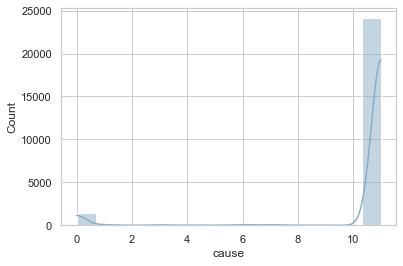

In [179]:
sn.set_theme(style="whitegrid", palette="twilight")
sn.histplot(x = 'cause', data = data, kde=True)

[Text(0, 0, 'unknown'),
 Text(1, 0, 'Earthquake'),
 Text(2, 0, 'Earthquake and Landslide'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'Volcano'),
 Text(5, 0, 'Volcano and Earthquake'),
 Text(6, 0, 'Questionable Earthquake'),
 Text(7, 0, 'Meteorological'),
 Text(8, 0, 'Landslide'),
 Text(9, 0, 'Volcano, Earthquake and Landslide'),
 Text(10, 0, 'Volcano and Landslide'),
 Text(11, 0, 'Explosion')]

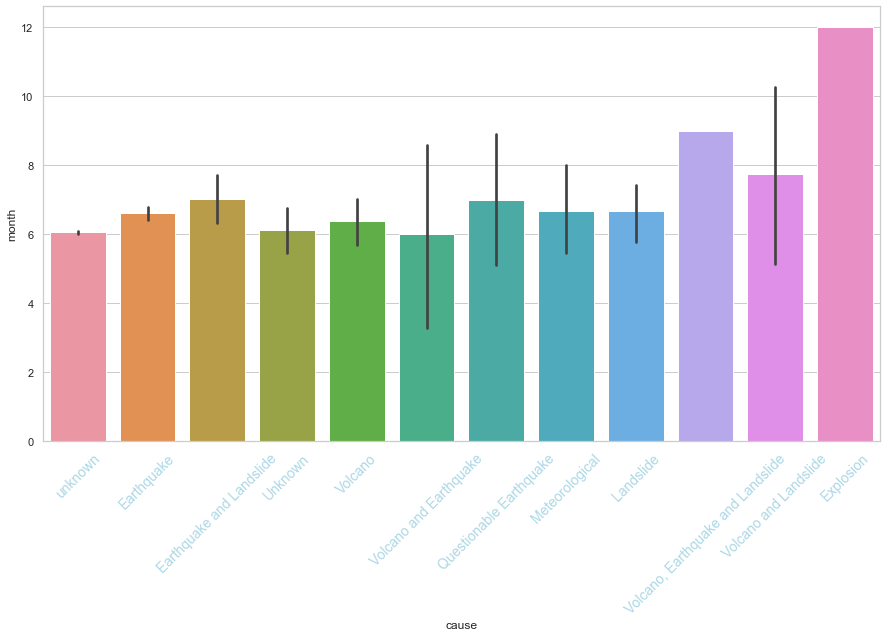

In [193]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(15,8))
sns.barplot(y = 'month', x = 'cause', data = data).set_xticklabels( data.cause.unique() ,rotation=45, size=14, color='lightblue')

In [24]:
data.describe(exclude = 'number')

,location_n,area,country,type_mea_1,event_re_1,cause,event_va_1,date
count,25911,25911,25911,25911,25911,25911,25911,25911
unique,7984,250,143,11,24,12,7,1926
top,"Miyagi Prefecture, Tohoku Region",unknown,Japan,Tide-gauge measurement,Japan,unknown,unknown,11/03/2011
freq,2367,6874,11467,6420,10075,24108,24107,6031


In [26]:
#Convert the Categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
data['location_n'] = labelEncoder_X.fit_transform(data['location_n'])
data['area'] = labelEncoder_X.fit_transform(data['area'])
data['country'] = labelEncoder_X.fit_transform(data['country'])
data['type_mea_1'] = labelEncoder_X.fit_transform(data['type_mea_1'])
data['event_re_1'] = labelEncoder_X.fit_transform(data['event_re_1'])
data['cause'] = labelEncoder_X.fit_transform(data['cause'])
data['event_va_1'] = labelEncoder_X.fit_transform(data['event_va_1'])
data.head(1)

,id,year,month,day,period,latitude,longitude,location_n,area,country,...,runup_ht_r,runup_hori,type_measu,type_mea_1,dist_from_,event_regi,event_re_1,cause,event_va_1,date
0,15817,2004,12,26,0.0,5.283,95.247,59,0,53,...,5,0.0,5,5,229,60,9,11,6,26/12/2004


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

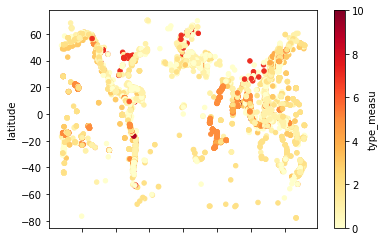

In [34]:
data.plot(x="longitude", y="latitude", kind="scatter", c="type_measu",
        colormap="YlOrRd")

type_measu
runup_ht_r

<AxesSubplot:xlabel='type_measu', ylabel='Count'>

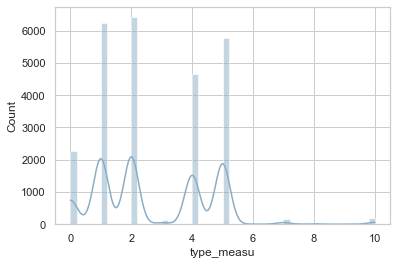

In [36]:
sn.set_theme(style="whitegrid", palette="twilight")
sn.histplot(x = 'type_measu', data = data, kde=True)

<AxesSubplot:xlabel='runup_ht_r', ylabel='Count'>

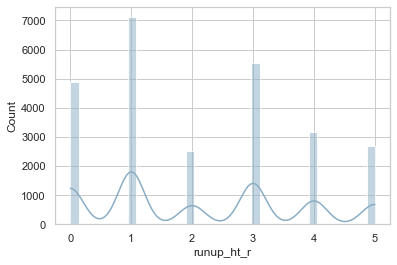

In [37]:
sn.set_theme(style="whitegrid", palette="twilight")
sn.histplot(x = 'runup_ht_r', data = data, kde=True)

In [41]:
data.iloc[:,14] 

0        5
1        5
2        5
3        1
4        1
        ..
26452    2
26453    1
26454    2
26455    2
26456    7
Name: type_measu, Length: 25911, dtype: int64

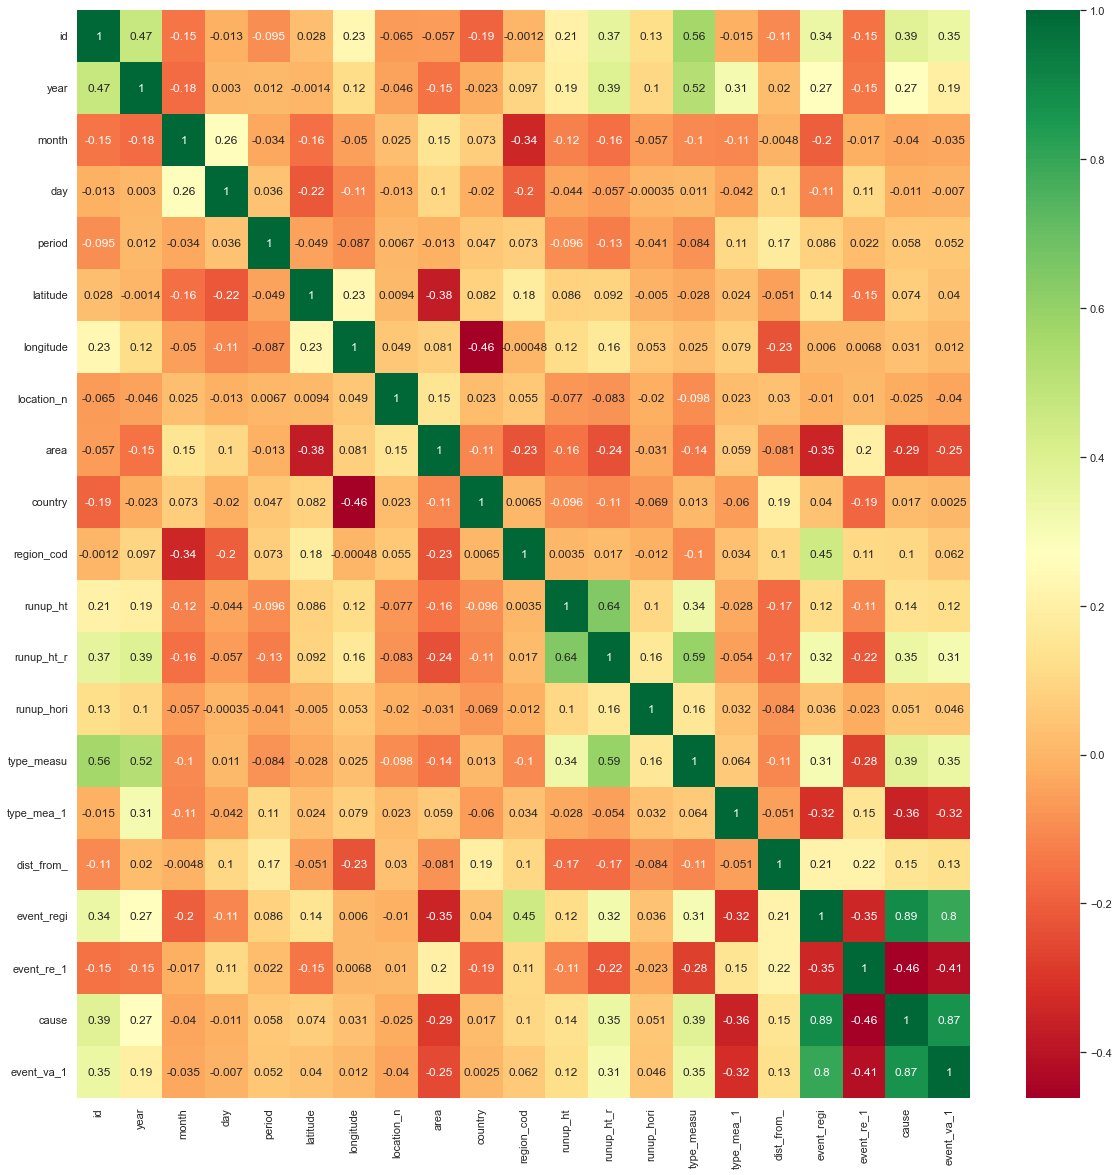

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

X = data.iloc[:,0:22]  #independent columns
y = data.iloc[:,14]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

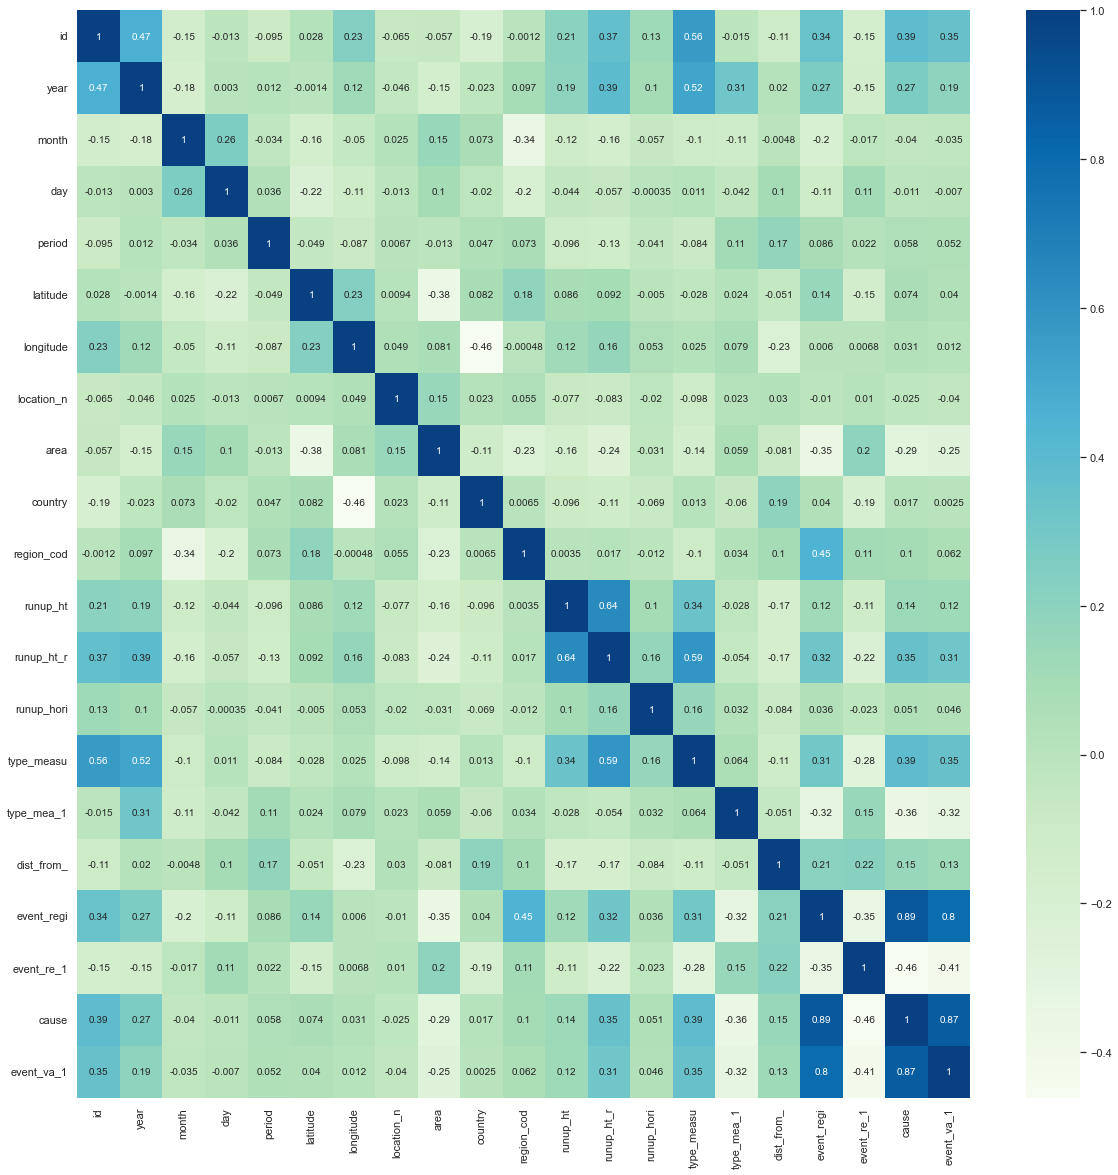

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns

X = data.iloc[:,0:22]  #independent columns
y = data.iloc[:,11]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="GnBu")

0        5
1        5
2        5
3        4
4        2
        ..
26452    1
26453    5
26454    1
26455    1
26456    2
Name: runup_ht_r, Length: 25911, dtype: int64

In [173]:
x = data.drop(['runup_ht_r'], axis = 1)
y = data['runup_ht_r']

In [164]:
x = new_data.drop(['runup_ht_r'], axis = 1)
y = new_data['runup_ht_r']

In [174]:
#good for nn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [43]:
#good for nn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [138]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 1.0


In [140]:
y_pred = model.predict(X_test)
print('predicted (r2_score):', model.score(X_test, y_test))

predicted (r2_score): 1.0


In [115]:
y_pred = model.predict(X_test)
print("MAE prediction ", mean_absolute_error(y_test, y_pred))
print("MSE prediction ", mean_squared_error(y_test, y_pred))
print("MAPE prediction ", round(mean_absolute_percentage_error(y_test, y_pred),2) ,"%")

MAE prediction  7.884995055291567e-15
MSE prediction  1.142034945863268e-28
MAPE prediction  4.84 %


In [175]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=20, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 12)                252       
                                                                 
 dense_37 (Dense)            (None, 128)               1664      
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dense_40 (Dense)            (None, 256)               16640     
                                                                 
 dense_41 (Dense)            (None, 1)                 257       
                                                                 
Total params: 43,581
Trainable params: 43,581
Non-trai

In [128]:
history_NN1 = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
648/648 [==============================] - 1s 1ms/step - loss: 27.6588 - mae: 1.7234
Epoch 2/10
648/648 [==============================] - 1s 1ms/step - loss: 1.9457 - mae: 1.0017
Epoch 3/10
648/648 [==============================] - 1s 968us/step - loss: 1.8257 - mae: 0.9573
Epoch 4/10
648/648 [==============================] - 1s 966us/step - loss: 1.6977 - mae: 0.9114
Epoch 5/10
648/648 [==============================] - 1s 964us/step - loss: 1.6428 - mae: 0.8905
Epoch 6/10
648/648 [==============================] - 1s 966us/step - loss: 1.5583 - mae: 0.8571
Epoch 7/10
648/648 [==============================] - 1s 959us/step - loss: 1.5008 - mae: 0.8358
Epoch 8/10
648/648 [==============================] - 1s 959us/step - loss: 1.4144 - mae: 0.8003
Epoch 9/10
648/648 [==============================] - 1s 957us/step - loss: 1.3175 - mae: 0.7718
Epoch 10/10
648/648 [==============================] - 1s 956us/step - loss: 1.2625 - mae: 0.7610


In [129]:
#after back propagation 
history = model.fit(X_train, y_train, epochs=100, batch_size= 60)

Epoch 1/100
346/346 [==============================] - 0s 1ms/step - loss: 1.0138 - mae: 0.6591
Epoch 2/100
346/346 [==============================] - 0s 1ms/step - loss: 0.9289 - mae: 0.6241
Epoch 3/100
346/346 [==============================] - 0s 1ms/step - loss: 0.8679 - mae: 0.6074
Epoch 4/100
346/346 [==============================] - 0s 1ms/step - loss: 0.8836 - mae: 0.6169
Epoch 5/100
346/346 [==============================] - 0s 1ms/step - loss: 0.9001 - mae: 0.6265
Epoch 6/100
346/346 [==============================] - 0s 1ms/step - loss: 0.8909 - mae: 0.6231
Epoch 7/100
346/346 [==============================] - 0s 1ms/step - loss: 0.6737 - mae: 0.5350
Epoch 8/100
346/346 [==============================] - 0s 1ms/step - loss: 0.6048 - mae: 0.5158
Epoch 9/100
346/346 [==============================] - 0s 1ms/step - loss: 0.4994 - mae: 0.4738
Epoch 10/100
346/346 [==============================] - 0s 1ms/step - loss: 0.4582 - mae: 0.4600
Epoch 11/100
346/346 [=================

346/346 [==============================] - 0s 1ms/step - loss: 0.0024 - mae: 0.0301
Epoch 86/100
346/346 [==============================] - 0s 1ms/step - loss: 0.2392 - mae: 0.2328
Epoch 87/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0304 - mae: 0.0947
Epoch 88/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0069 - mae: 0.0382
Epoch 89/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0638 - mae: 0.1178
Epoch 90/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0281 - mae: 0.0726
Epoch 91/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0017 - mae: 0.0242
Epoch 92/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0062 - mae: 0.0404
Epoch 93/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0599 - mae: 0.1506
Epoch 94/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0378 - mae: 0.0974
Epoch 95/100
346/346 [=====================

In [176]:
#after back propagation 
history = model.fit(X_train, y_train, epochs=100, batch_size= 60)

Epoch 1/100
346/346 [==============================] - 1s 1ms/step - loss: 37.5696 - mae: 2.1945
Epoch 2/100
346/346 [==============================] - 0s 1ms/step - loss: 1.5705 - mae: 0.9907
Epoch 3/100
346/346 [==============================] - 0s 1ms/step - loss: 1.5942 - mae: 0.9879
Epoch 4/100
346/346 [==============================] - 0s 1ms/step - loss: 1.5024 - mae: 0.9575
Epoch 5/100
346/346 [==============================] - 0s 1ms/step - loss: 1.4139 - mae: 0.9242
Epoch 6/100
346/346 [==============================] - 0s 1ms/step - loss: 1.3692 - mae: 0.9073
Epoch 7/100
346/346 [==============================] - 0s 1ms/step - loss: 1.3590 - mae: 0.9013
Epoch 8/100
346/346 [==============================] - 0s 1ms/step - loss: 1.2942 - mae: 0.8787
Epoch 9/100
346/346 [==============================] - 0s 1ms/step - loss: 1.2943 - mae: 0.8766
Epoch 10/100
346/346 [==============================] - 0s 1ms/step - loss: 1.2484 - mae: 0.8618
Epoch 11/100
346/346 [================

346/346 [==============================] - 0s 1ms/step - loss: 0.1142 - mae: 0.2106
Epoch 86/100
346/346 [==============================] - 0s 1ms/step - loss: 0.1114 - mae: 0.2062
Epoch 87/100
346/346 [==============================] - 0s 1ms/step - loss: 0.1071 - mae: 0.2005
Epoch 88/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0893 - mae: 0.1802
Epoch 89/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0915 - mae: 0.1833
Epoch 90/100
346/346 [==============================] - 0s 1ms/step - loss: 0.1568 - mae: 0.2727
Epoch 91/100
346/346 [==============================] - 0s 1ms/step - loss: 0.1211 - mae: 0.2311
Epoch 92/100
346/346 [==============================] - 0s 1ms/step - loss: 0.1054 - mae: 0.2042
Epoch 93/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0998 - mae: 0.1885
Epoch 94/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0881 - mae: 0.1767
Epoch 95/100
346/346 [=====================

In [170]:
#after back propagation 
history = model.fit(X_train, y_train, epochs=100, batch_size= 60)

Epoch 1/100
346/346 [==============================] - 1s 1ms/step - loss: 3.9741 - mae: 1.3200
Epoch 2/100
346/346 [==============================] - 0s 1ms/step - loss: 1.2675 - mae: 0.8865
Epoch 3/100
346/346 [==============================] - 0s 1ms/step - loss: 0.8104 - mae: 0.6895
Epoch 4/100
346/346 [==============================] - 0s 1ms/step - loss: 0.5239 - mae: 0.5483
Epoch 5/100
346/346 [==============================] - 0s 1ms/step - loss: 0.3427 - mae: 0.4389
Epoch 6/100
346/346 [==============================] - 0s 1ms/step - loss: 0.3499 - mae: 0.4478
Epoch 7/100
346/346 [==============================] - 0s 1ms/step - loss: 0.3321 - mae: 0.4345
Epoch 8/100
346/346 [==============================] - 0s 1ms/step - loss: 0.2845 - mae: 0.3987
Epoch 9/100
346/346 [==============================] - 0s 1ms/step - loss: 0.2762 - mae: 0.3943
Epoch 10/100
346/346 [==============================] - 0s 1ms/step - loss: 0.2438 - mae: 0.3739
Epoch 11/100
346/346 [=================

346/346 [==============================] - 0s 1ms/step - loss: 0.0687 - mae: 0.1436
Epoch 86/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0787 - mae: 0.1625
Epoch 87/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0589 - mae: 0.1334
Epoch 88/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0692 - mae: 0.1470
Epoch 89/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0614 - mae: 0.1375
Epoch 90/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0695 - mae: 0.1476
Epoch 91/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0707 - mae: 0.1509
Epoch 92/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0719 - mae: 0.1520
Epoch 93/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0690 - mae: 0.1440
Epoch 94/100
346/346 [==============================] - 0s 1ms/step - loss: 0.0617 - mae: 0.1369
Epoch 95/100
346/346 [=====================

In [177]:
#before feature
y_pred = model.predict(X_test)
print("MAE prediction ", mean_absolute_error(y_test, y_pred))
print("MSE prediction ", mean_squared_error(y_test, y_pred))
print("r2_score", r2_score(y_test, y_pred))

MAE prediction  0.15751874652431896
MSE prediction  0.07265801745042551
r2_score 0.9726738992135222


In [171]:
#after feature
y_pred = model.predict(X_test)
print("MAE prediction ", mean_absolute_error(y_test, y_pred))
print("MSE prediction ", mean_squared_error(y_test, y_pred))
print("r2_score", r2_score(y_test, y_pred))

MAE prediction  0.11079547695273624
MSE prediction  0.04923927817361867
r2_score 0.9810294426175052


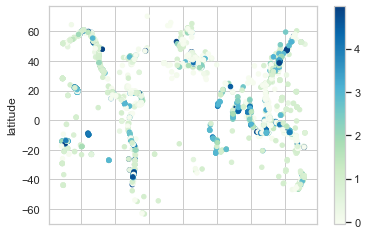

In [194]:
#predicted
X_test.plot(x="longitude", y="latitude", kind="scatter", c=y_pred,
        colormap="GnBu")
plt.savefig('pred.png')

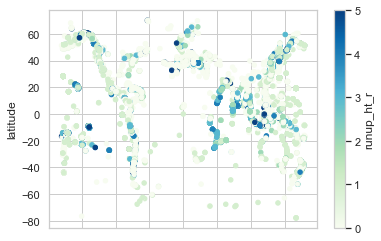

In [195]:
#original
data.plot(x="longitude", y="latitude", kind="scatter", c="runup_ht_r",
        colormap="GnBu")
plt.savefig('org.png')

In [161]:
#after feature eng
new_data=data.drop(["id","day","period","area","country","event_re_1","dist_from_"],axis=1)

In [162]:
new_data.shape


(25911, 14)

In [166]:
import numpy as np
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
model_2 = LinearRegression().fit(X_train, y_train)
r_sq = model_2.score(X_train, y_train)
print('coefficient of determination:', r_sq)
y_pred = model_2.predict(X_test)
print("MAE prediction ", mean_absolute_error(y_test, y_pred))
print("MSE prediction ", mean_squared_error(y_test, y_pred))
print("MAPE prediction ", round(mean_absolute_percentage_error(y_test, y_pred),2) ,"%")

coefficient of determination: 0.6101397906683037
MAE prediction  0.7439965524104929
MSE prediction  1.0119979923729994
MAPE prediction  689827826954861.4 %
